# simple aver


```
# This is formatted as code
```



In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


# Load the trained model
model2 = load_model('/content/drive/MyDrive/CapstoneTeam_115/20231106-08361699259804-On-100-videos-vit-2.h5')
model = load_model('/content/drive/MyDrive/Capstone_trial/videos/models/20231102-12231698907993-On-100-videos.h5')

In [39]:
# Define constants
IMG_SIZE = 224
SEQUENCE_LENGTH2 = 10

SEQUENCE_LENGTH = 32
# Preprocess a single frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    frame = frame / 255.0  # Normalize the frame
    return frame

# Preprocess the video frames
def preprocess_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        preprocessed_frame = preprocess_frame(frame)
        frames.append(preprocessed_frame)

        if len(frames) == SEQUENCE_LENGTH2:
            sequence = np.array(frames)
            sequence = np.expand_dims(sequence, axis=0)
            yield sequence

    cap.release()

# Make predictions on a video
def make_prediction2(video_path):
    # Preprocess video frames
    video_frames = preprocess_video_frames(video_path)

    for frames in video_frames:
        prediction = model2.predict(frames)

        if prediction > 0.0007:
            result = "Accident"
        else:
            result = "Non-Accident"

        return prediction, result
def make_prediction(video_path):
    # Preprocess video frames
    video_frames = preprocess_video_frames(video_path)

    for frames in video_frames:
        prediction = model2.predict(frames)

        if prediction > 0.0007:
            result = "Accident"
        else:
            result = "Non-Accident"

        return prediction, result
en=[]
video_folder_positive = "/content/drive/MyDrive/test/pos"
video_folder_negative = "/content/drive/MyDrive/test/neg"
for video_file in os.listdir(video_folder_positive):
    if video_file.endswith(".mp4"):
      video_path = os.path.join(video_folder_positive, video_file)
      prediction1, result1 = make_prediction(video_path)
      prediction2, result2 = make_prediction2(video_path)

      # Ensemble prediction using simple averaging
      ensemble_prediction = (prediction1 + prediction2) / 2
      en.append(ensemble_prediction)
      print(ensemble_prediction,video_path)
for video_file in os.listdir(video_folder_negative):
    if video_file.endswith(".mp4"):
      video_path = os.path.join(video_folder_negative, video_file)
      prediction1, result1 = make_prediction(video_path)
      prediction2, result2 = make_prediction2(video_path)

      # Ensemble prediction using simple averaging
      ensemble_prediction = (prediction1 + prediction2) / 2
      en.append(ensemble_prediction)
      print(ensemble_prediction,video_path)


1/1 [==============================] - 0s 64ms/step
[[0.6392377]] /content/drive/MyDrive/test/pos/8.mp4
1/1 [==============================] - 0s 50ms/step
[[0.7019196]] /content/drive/MyDrive/test/pos/37.mp4
1/1 [==============================] - 0s 48ms/step
[[0.49082837]] /content/drive/MyDrive/test/pos/36.mp4
1/1 [==============================] - 0s 44ms/step
[[0.9888754]] /content/drive/MyDrive/test/pos/39.mp4
1/1 [==============================] - 0s 43ms/step
[[5.629099e-05]] /content/drive/MyDrive/test/pos/40.mp4
1/1 [==============================] - 0s 43ms/step
[[0.92033136]] /content/drive/MyDrive/test/pos/45.mp4
1/1 [==============================] - 0s 44ms/step
[[0.9260399]] /content/drive/MyDrive/test/pos/46.mp4
1/1 [==============================] - 0s 42ms/step
[[0.9498325]] /content/drive/MyDrive/test/pos/9.mp4
1/1 [==============================] - 0s 49ms/step
[[0.7978349]] /content/drive/MyDrive/test/pos/92.mp4
1/1 [==============================] - 0s 42ms/step


In [36]:
len(en)

30

In [26]:
print(en)
y_test=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
len(y_test)

[array([[0.6392377]], dtype=float32), array([[0.13975653]], dtype=float32), array([[0.05372236]], dtype=float32), array([[0.04782955]], dtype=float32), array([[0.7019196]], dtype=float32), array([[0.49082837]], dtype=float32), array([[0.9888754]], dtype=float32), array([[5.629099e-05]], dtype=float32), array([[0.40937963]], dtype=float32), array([[0.02607391]], dtype=float32), array([[0.92033136]], dtype=float32), array([[0.9260399]], dtype=float32), array([[0.03242893]], dtype=float32), array([[0.9498325]], dtype=float32), array([[0.7978349]], dtype=float32), array([[0.838261]], dtype=float32), array([[0.54234815]], dtype=float32), array([[0.00571824]], dtype=float32), array([[0.12510188]], dtype=float32), array([[0.02156991]], dtype=float32), array([[0.00957538]], dtype=float32), array([[0.17223828]], dtype=float32), array([[0.23112902]], dtype=float32), array([[0.03402194]], dtype=float32), array([[0.01047906]], dtype=float32), array([[0.1162136]], dtype=float32), array([[0.98944384

30

Accuracy: 0.87
Precision: 0.82
Recall: 0.93
F1-Score: 0.87


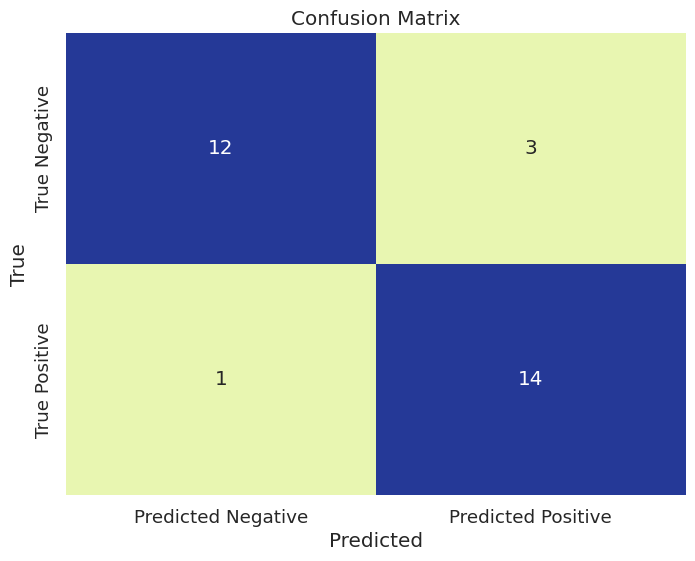

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming y_test contains the true labels and ensemble_predictions contains the predicted probabilities
# Convert probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
y_test=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
threshold = 0.47
binary_predictions=[]
for i in en:
  if i>threshold:
    binary_predictions.append(1)
  else:
    binary_predictions.append(0)

  #binary_predictions = (i > threshold).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
#roc_auc = roc_auc_score(y_test, en)
#logloss = log_loss(y_test, en)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#print(f"AUC-ROC: {roc_auc:.2f}")
#print(f"Log Loss: {logloss:.2f}")
#print(f"Confusion Matrix:\n{confusion_mat}")
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
cmap = sns.color_palette("YlGnBu")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

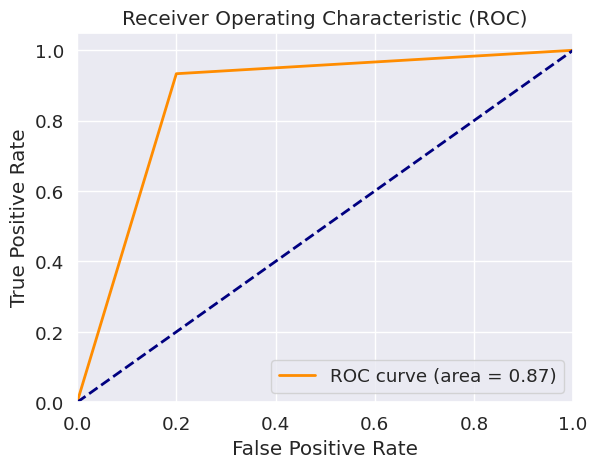

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# weighted averging

In [42]:


# Define constants
IMG_SIZE = 224
SEQUENCE_LENGTH2 = 10

SEQUENCE_LENGTH = 32
# Preprocess a single frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    frame = frame / 255.0  # Normalize the frame
    return frame

# Preprocess the video frames
def preprocess_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        preprocessed_frame = preprocess_frame(frame)
        frames.append(preprocessed_frame)

        if len(frames) == SEQUENCE_LENGTH2:
            sequence = np.array(frames)
            sequence = np.expand_dims(sequence, axis=0)
            yield sequence

    cap.release()

# Make predictions on a video
def make_prediction2(video_path):
    # Preprocess video frames
    video_frames = preprocess_video_frames(video_path)

    for frames in video_frames:
        prediction = model2.predict(frames)

        if prediction > 0.0007:
            result = "Accident"
        else:
            result = "Non-Accident"

        return prediction, result
def make_prediction(video_path):
    # Preprocess video frames
    video_frames = preprocess_video_frames(video_path)

    for frames in video_frames:
        prediction = model2.predict(frames)

        if prediction > 0.0007:
            result = "Accident"
        else:
            result = "Non-Accident"

        return prediction, result
en=[]
weight_model1 = 0.6
weight_model2 = 0.4
video_folder_positive = "/content/drive/MyDrive/test/pos"
video_folder_negative = "/content/drive/MyDrive/test/neg"
for video_file in os.listdir(video_folder_positive):
    if video_file.endswith(".mp4"):
      video_path = os.path.join(video_folder_positive, video_file)
      prediction1, result1 = make_prediction(video_path)
      prediction2, result2 = make_prediction2(video_path)

      # Ensemble prediction using simple averaging
      ensemble_prediction = (prediction1 + prediction2) / 2
      en.append(ensemble_prediction)
      print(ensemble_prediction,video_path)
for video_file in os.listdir(video_folder_negative):
    if video_file.endswith(".mp4"):
      video_path = os.path.join(video_folder_negative, video_file)
      prediction1, result1 = make_prediction(video_path)
      prediction2, result2 = make_prediction2(video_path)

      # Ensemble prediction using simple averaging
      # Ensemble prediction using weighted averaging
      ensemble_prediction = (weight_model1 * prediction1 + weight_model2 * prediction2) / (weight_model1 + weight_model2)

      en.append(ensemble_prediction)
      print(ensemble_prediction,video_path)# Assign weights to models




1/1 [==============================] - 0s 121ms/step
[[0.6392377]] /content/drive/MyDrive/test/pos/8.mp4
1/1 [==============================] - 0s 87ms/step
[[0.7019196]] /content/drive/MyDrive/test/pos/37.mp4
1/1 [==============================] - 0s 54ms/step
[[0.49082837]] /content/drive/MyDrive/test/pos/36.mp4
1/1 [==============================] - 0s 57ms/step
[[0.9888754]] /content/drive/MyDrive/test/pos/39.mp4
1/1 [==============================] - 0s 54ms/step
[[5.629099e-05]] /content/drive/MyDrive/test/pos/40.mp4
1/1 [==============================] - 0s 56ms/step
[[0.92033136]] /content/drive/MyDrive/test/pos/45.mp4
1/1 [==============================] - 0s 59ms/step
[[0.9260399]] /content/drive/MyDrive/test/pos/46.mp4
1/1 [==============================] - 0s 42ms/step
[[0.9498325]] /content/drive/MyDrive/test/pos/9.mp4
1/1 [==============================] - 0s 56ms/step
[[0.7978349]] /content/drive/MyDrive/test/pos/92.mp4
1/1 [==============================] - 0s 52ms/step

Accuracy: 0.87
Precision: 0.82
Recall: 0.93
F1-Score: 0.87


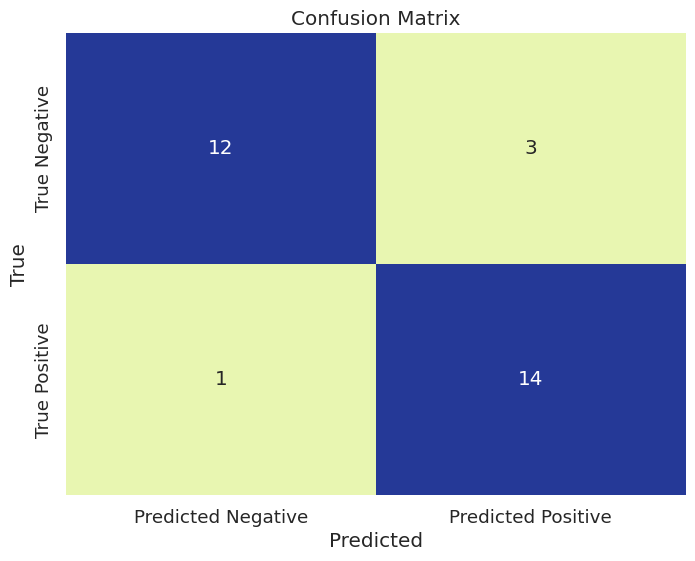

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming y_test contains the true labels and ensemble_predictions contains the predicted probabilities
# Convert probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
y_test=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
threshold = 0.47
binary_predictions=[]
for i in en:
  if i>threshold:
    binary_predictions.append(1)
  else:
    binary_predictions.append(0)

  #binary_predictions = (i > threshold).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
#roc_auc = roc_auc_score(y_test, en)
#logloss = log_loss(y_test, en)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#print(f"AUC-ROC: {roc_auc:.2f}")
#print(f"Log Loss: {logloss:.2f}")
#print(f"Confusion Matrix:\n{confusion_mat}")
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
cmap = sns.color_palette("YlGnBu")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# bayesian

In [8]:
from scipy.stats import norm



# Define constants
IMG_SIZE = 224
SEQUENCE_LENGTH2 = 10

SEQUENCE_LENGTH = 32
# Preprocess a single frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    frame = frame / 255.0  # Normalize the frame
    return frame

# Preprocess the video frames
def preprocess_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        preprocessed_frame = preprocess_frame(frame)
        frames.append(preprocessed_frame)

        if len(frames) == SEQUENCE_LENGTH2:
            sequence = np.array(frames)
            sequence = np.expand_dims(sequence, axis=0)
            yield sequence

    cap.release()

# Make predictions on a video
def make_prediction2(video_path):
    # Preprocess video frames
    video_frames = preprocess_video_frames(video_path)

    for frames in video_frames:
        prediction = model2.predict(frames)

        if prediction > 0.0007:
            result = "Accident"
        else:
            result = "Non-Accident"

        return prediction, result
def make_prediction(video_path):
    # Preprocess video frames
    video_frames = preprocess_video_frames(video_path)

    for frames in video_frames:
        prediction = model2.predict(frames)

        if prediction > 0.0007:
            result = "Accident"
        else:
            result = "Non-Accident"

        return prediction, result
en=[]
weight_model1 = 0.6
weight_model2 = 0.4
video_folder_positive = "/content/drive/MyDrive/test/pos"
video_folder_negative = "/content/drive/MyDrive/test/neg"
for video_file in os.listdir(video_folder_positive):
    if video_file.endswith(".mp4"):
      video_path = os.path.join(video_folder_positive, video_file)
      prediction1, result1 = make_prediction(video_path)
      prediction2, result2 = make_prediction2(video_path)

      # Ensemble prediction using simple averaging
      ensemble_prediction = (prediction1 + prediction2) / 2
      en.append(ensemble_prediction)
      print(ensemble_prediction,video_path)
for video_file in os.listdir(video_folder_negative):
    if video_file.endswith(".mp4"):
      video_path = os.path.join(video_folder_negative, video_file)
      prediction1, result1 = make_prediction(video_path)
      prediction2, result2 = make_prediction2(video_path)
      predictions = [prediction1, prediction2]  # Add more models if needed

      # Calculate posterior probabilities for each model
      posteriors = [norm.pdf(prediction, loc=0.5, scale=0.1) for prediction in predictions]

      # Calculate weights based on posterior probabilities
      weights = [posterior / sum(posteriors) for posterior in posteriors]

      # Ensemble prediction using Bayesian Model Averaging
      ensemble_prediction = sum(weight * prediction for weight, prediction in zip(weights, predictions))


      en.append(ensemble_prediction)
      print(ensemble_prediction,video_path)# Assign weights to models



# Assuming predictions are probabilities




1/1 [==============================] - 0s 383ms/step
[[0.99856246]] /content/drive/MyDrive/test/pos/1.mp4
1/1 [==============================] - 0s 413ms/step
[[0.9043952]] /content/drive/MyDrive/test/pos/11.mp4
1/1 [==============================] - 1s 678ms/step
[[0.9501403]] /content/drive/MyDrive/test/pos/22.mp4
1/1 [==============================] - 1s 1s/step
[[0.49756572]] /content/drive/MyDrive/test/pos/26.mp4
1/1 [==============================] - 1s 923ms/step
[[0.8831462]] /content/drive/MyDrive/test/pos/27.mp4
1/1 [==============================] - 1s 845ms/step
[[0.884017]] /content/drive/MyDrive/test/pos/28.mp4
1/1 [==============================] - 1s 734ms/step
[[0.49083215]] /content/drive/MyDrive/test/pos/36.mp4
1/1 [==============================] - 1s 635ms/step
[[0.70191926]] /content/drive/MyDrive/test/pos/37.mp4
1/1 [==============================] - 1s 690ms/step
[[0.9888755]] /content/drive/MyDrive/test/pos/39.mp4
1/1 [==============================] - 0s 386ms

Accuracy: 0.90
Precision: 0.88
Recall: 0.93
F1-Score: 0.90


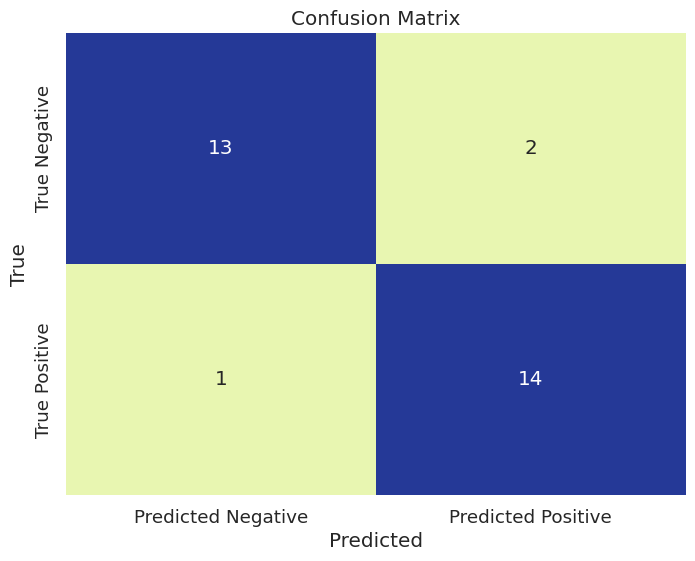

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming y_test contains the true labels and ensemble_predictions contains the predicted probabilities
# Convert probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
y_test=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
threshold = 0.47
binary_predictions=[]
for i in en:
  if i>threshold:
    binary_predictions.append(1)
  else:
    binary_predictions.append(0)

  #binary_predictions = (i > threshold).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
#roc_auc = roc_auc_score(y_test, en)
#logloss = log_loss(y_test, en)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#print(f"AUC-ROC: {roc_auc:.2f}")
#print(f"Log Loss: {logloss:.2f}")
#print(f"Confusion Matrix:\n{confusion_mat}")
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
cmap = sns.color_palette("YlGnBu")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

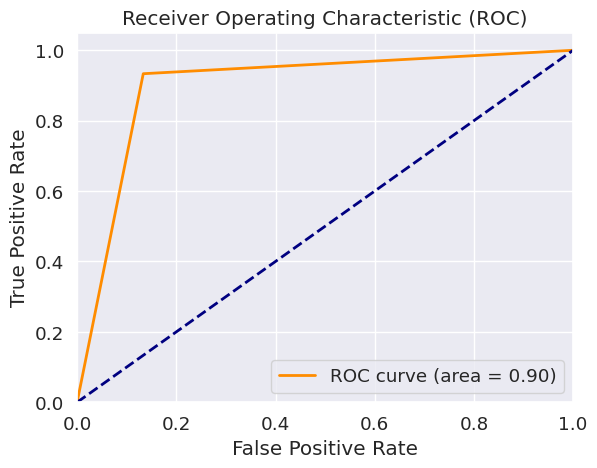

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()